In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [2]:
train_data =pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
test_data.shape

(555719, 23)

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
fig = px.pie(values=train_data['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine Transactions")
fig.show()

In [ ]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [ ]:
train_data.isnull().sum(),test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [3]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1296675, 14)
(555719, 14)


In [4]:
#handle datetime
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date']=train_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_data['trans_date']=pd.to_datetime(train_data['trans_date'])
train_data['dob']=pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date']=test_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_data['trans_date']=pd.to_datetime(test_data['trans_date'])
test_data['dob']=pd.to_datetime(test_data['dob'])

Data Prepocessing


In [5]:
#Feature Engineering
#Calculate Age
train_data["age"] = train_data["trans_date"]-train_data["dob"]
train_data["age"]=train_data["age"].astype('timedelta64[Y]')

test_data["age"] = test_data["trans_date"]-test_data["dob"]
test_data["age"]=test_data["age"].astype('timedelta64[Y]')

In [6]:
# Get Transaction Month & Year
train_data['trans_month'] = pd.DatetimeIndex(train_data['trans_date']).month
train_data['trans_year'] = pd.DatetimeIndex(train_data['trans_date']).year

In [7]:
#Calculate distance between merchant and home location
train_data['latitudinal_distance'] = abs(round(train_data['merch_lat']-train_data['lat'],3))
train_data['longitudinal_distance'] = abs(round(train_data['merch_long']-train_data['long'],3))

test_data['latitudinal_distance'] = abs(round(test_data['merch_lat']-test_data['lat'],3))
test_data['longitudinal_distance'] = abs(round(test_data['merch_long']-test_data['long'],3))

In [8]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [9]:
# Convert categorical column gender into numerical
train_data.gender=train_data.gender.apply(lambda x: 1 if x=="M" else 0)
test_data.gender=test_data.gender.apply(lambda x: 1 if x=="M" else 0)

In [10]:
#One Hot Encoding of Category column
train_data = pd.get_dummies(train_data, columns=['category'], prefix='category')
test_data = pd.get_dummies(test_data, columns=['category'], prefix='category')

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [ ]:
train_data.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,0.970,0.108,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_data.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0,0,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0,0,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,0,0,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,0,0,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,0,0,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  float64
 5   trans_month              1296675 non-null  int64  
 6   trans_year               1296675 non-null  int64  
 7   latitudinal_distance     1296675 non-null  float64
 8   longitudinal_distance    1296675 non-null  float64
 9   category_entertainment   1296675 non-null  uint8  
 10  category_food_dining     1296675 non-null  uint8  
 11  category_gas_transport   1296675 non-null  uint8  
 12  category_grocery_net     1296675 non-null  uint8  
 13  category_grocery_pos     1296675 non-null 

(None, None)

In [11]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [12]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)


# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.33      0.72      0.45      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.86      0.73    555719
weighted avg       1.00      0.99      0.99    555719



In [ ]:
from sklearn.metrics import recall_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate recall for Class 1 (fraud)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print the recall
print(f"Recall for Class 1 (fraud): {recall}")


Recall for Class 1 (fraud): 0.717016317016317


In [ ]:
from sklearn.metrics import precision_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate precision for Class 1 (fraud)
precision = precision_score(y_test, y_pred, pos_label=1)

# Print the precision
print(f"Precision for Class 1 (fraud): {precision}")


Precision for Class 1 (fraud): 0.3329004329004329


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.79      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.89      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
from sklearn.metrics import recall_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate recall for Class 1 (fraud)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print the recall
print(f"Recall for Class 1 (fraud): {recall}")


Recall for Class 1 (fraud): 0.7864801864801865


In [ ]:
from sklearn.metrics import precision_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate precision for Class 1 (fraud)
precision = precision_score(y_test, y_pred, pos_label=1)

# Print the precision
print(f"Precision for Class 1 (fraud): {precision}")


Precision for Class 1 (fraud): 0.5567656765676567


In [ ]:
# Import necessary libraries
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(
    learning_rate=0.1,  # Learning rate (controls step size during training)
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum tree depth
    objective='binary:logistic',  # Binary classification problem
    random_state=42
)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)



              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.85      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.92      0.63    555719
weighted avg       1.00      0.98      0.99    555719



In [ ]:
from sklearn.metrics import recall_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate recall for Class 1 (fraud)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print the recall
print(f"Recall for Class 1 (fraud): {recall}")


from sklearn.metrics import precision_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate precision for Class 1 (fraud)
precision = precision_score(y_test, y_pred, pos_label=1)

# Print the precision
print(f"Precision for Class 1 (fraud): {precision}")



Recall for Class 1 (fraud): 0.8512820512820513
Precision for Class 1 (fraud): 0.1585895431648428


In [ ]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
report = classification_report(y_test, y_pred)
acc_gaussian = round(nb.score(X_train, y_train) * 100, 2)
print("Naive Bayes classfier accuracy"+str(acc_gaussian))
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Naive Bayes classfier accuracy81.97


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import precision_score, f1_score

# Assuming you have already trained your model and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate precision for Class 1 (fraud) and set zero_division
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=1)

# Calculate F1-score for Class 1 (fraud) and set zero_division
f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=1)

# Print precision and F1-score
print(f"Precision for Class 1 (fraud): {precision}")
print(f"F1-Score for Class 1 (fraud): {f1}")


Precision for Class 1 (fraud): 1.0
F1-Score for Class 1 (fraud): 0.0


In [ ]:
from sklearn.metrics import recall_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate recall for Class 1 (fraud)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print the recall
print(f"Recall for Class 1 (fraud): {recall}")


from sklearn.metrics import precision_score

# Assuming you have already trained your Decision Tree classifier and made predictions
# Replace y_pred with your actual predictions and y_test with your ground truth labels

# Calculate precision for Class 1 (fraud)
precision = precision_score(y_test, y_pred, pos_label=1)

# Print the precision
print(f"Precision for Class 1 (fraud): {precision}")



Recall for Class 1 (fraud): 0.0
Precision for Class 1 (fraud): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Load and split your data (X and y)
# Replace the following lines with your data loading and splitting code
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a RandomForestClassifier with your chosen hyperparameters
rf_classifier = RandomForestClassifier(
   n_estimators=200,  # Adjust this
    max_depth=20,      # Adjust this
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model on your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# # You can also perform cross-validation to get a more robust estimate of the model's performance
# cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Accuracy:", cross_val_scores.mean())


Test Accuracy: 0.994448633212109


In [ ]:
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.40      0.83      0.54      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.91      0.77    555719
weighted avg       1.00      0.99      1.00    555719



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a DecisionTreeClassifier with your chosen hyperparameters
dt_classifier = DecisionTreeClassifier(
    max_depth=10,             # Adjust this
    min_samples_split=2,      # Adjust this
    min_samples_leaf=1,       # Adjust this
    random_state=42
)

# Train the model on your training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Generate a classification report for evaluation
classification_rep = classification_report(y_test, y_pred)
# print("Updated Classification Report:")
print(classification_rep)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.93      0.08      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.93      0.52    555719
weighted avg       1.00      0.92      0.95    555719



In [ ]:
clf_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9973349840476932
Confusion Matrix:
 [[552769    805]
 [   676   1469]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.68      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719



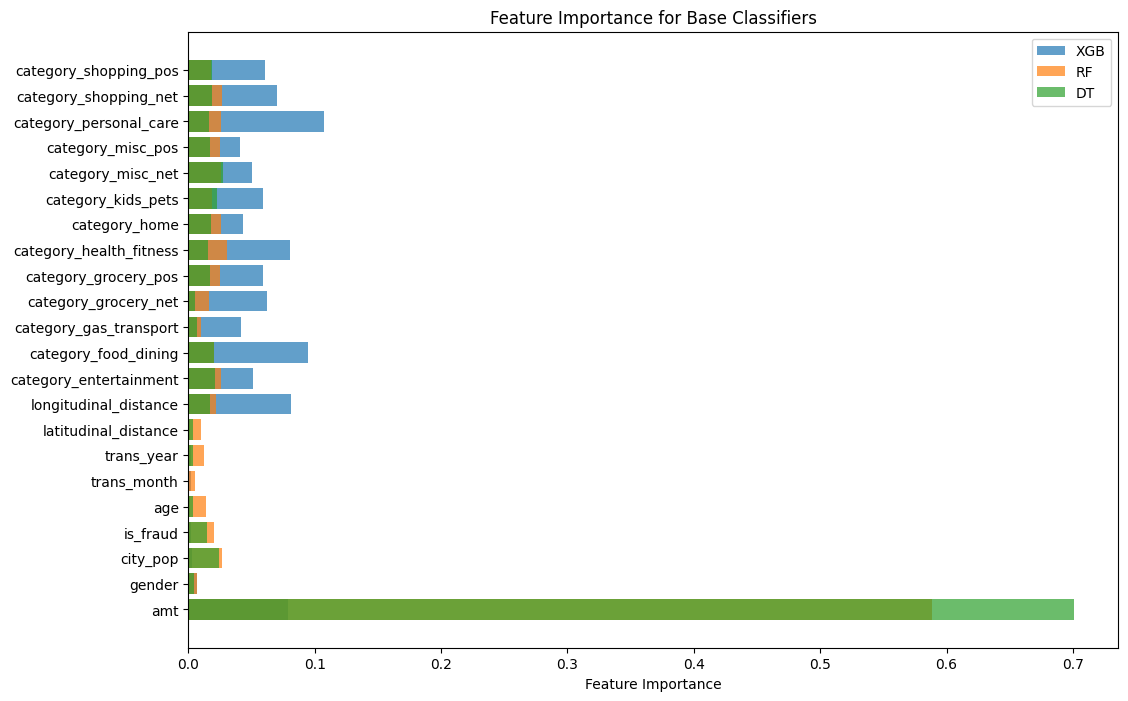

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_train and df_test are your training and testing DataFrames

# Split the data into features and target variable
# X_train = df_train.drop('is_fraud', axis=1)
# y_train = df_train['is_fraud']
# X_test = df_test.drop('is_fraud', axis=1)
# y_test = df_test['is_fraud']

# Initialize base classifiers
clf_nb = GaussianNB()
clf_xgb = XGBClassifier()
clf_rf = RandomForestClassifier()
clf_dt = DecisionTreeClassifier()

# Create a Voting Classifier with the base classifiers
ensemble_classifier = VotingClassifier(
    estimators=[
        ('nb', clf_nb),
        ('xgb', clf_xgb),
        ('rf', clf_rf),
        ('dt', clf_dt)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit each base classifier
clf_nb.fit(X_train, y_train)
clf_xgb.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the performance of the ensemble classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Convert X_train and X_test to DataFrames
X_train_df = pd.DataFrame(X_train, columns=train_data.columns[:-1])  # Assuming the last column is the target 'is_fraud'
X_test_df = pd.DataFrame(X_test, columns=test_data.columns[:-1])  # Assuming the last column is the target 'is_fraud'

# Extract feature names from the training data
feature_names = X_train_df.columns

# Retrieve feature importances from the base classifiers
feature_importances = {
    'NB': None,  # No feature importance attribute for Gaussian Naive Bayes
    'XGB': clf_xgb.feature_importances_,
    'RF': clf_rf.feature_importances_,
    'DT': clf_dt.feature_importances_
}

# Plot feature importance for each base classifier
plt.figure(figsize=(12, 8))

for model, importance in feature_importances.items():
    if importance is not None:
        plt.barh(feature_names, importance, label=model, alpha=0.7)

plt.xlabel('Feature Importance')
plt.title('Feature Importance for Base Classifiers')
plt.legend()
plt.show()


In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming X_train and y_train are your feature and target variables

# Convert NumPy array to DataFrame if needed
X_train_df = pd.DataFrame(X_train, columns=train_data.columns[:-1])  # Assuming the last column is the target 'is_fraud'
X_test_df = pd.DataFrame(X_test, columns=test_data.columns[:-1])  # Assuming the last column is the target 'is_fraud'


# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_feature_importance = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': dt_model.feature_importances_})

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_feature_importance = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': rf_model.feature_importances_})

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_feature_importance = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': xgb_model.feature_importances_})

# Display feature importance tables
print("Decision Tree Feature Importance:")
print(dt_feature_importance)

print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)

print("\nXGBoost Feature Importance:")
print(xgb_feature_importance)


Decision Tree Feature Importance:
                    Feature  Importance
0                       amt    0.700993
1                    gender    0.004544
2                  city_pop    0.024477
3                  is_fraud    0.014827
4                       age    0.003881
5               trans_month    0.000861
6                trans_year    0.003969
7      latitudinal_distance    0.003641
8     longitudinal_distance    0.017267
9    category_entertainment    0.021205
10     category_food_dining    0.020561
11   category_gas_transport    0.006680
12     category_grocery_net    0.005373
13     category_grocery_pos    0.017344
14  category_health_fitness    0.015282
15            category_home    0.017555
16       category_kids_pets    0.022532
17        category_misc_net    0.027276
18        category_misc_pos    0.017321
19   category_personal_care    0.016612
20    category_shopping_net    0.018829
21    category_shopping_pos    0.018968

Random Forest Feature Importance:
           